# Plot of fission product yields in 2D

Data source: __[JAEA Nuclear Data Center](https://wwwndc.jaea.go.jp/cgi-bin/FPYfig)__

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.style.use('seaborn')


def plot(data, kind='step', logy=False):
    fig, ax = plt.subplots(figsize=figsize)
    
    key = data[0].columns[0]
    
    for fy, c in zip(data, colors):
        if kind == 'step':
            plt.step(fy[key], fy['Fission Yield'], color=c, where='mid')
        elif kind == 'line':
            plt.plot(fy[key], fy['Fission Yield'], color=c)
        plt.fill_between(fy[key], fy['Fission Yield'], color=c, alpha=0.1)

    if key == 'A':
        plt.xlabel('Nucleons')
    elif key == 'Z':
        plt.xlabel('Atomic Number')
    
    plt.ylabel('Fission Yield')
    plt.legend(isotopes)
    
    if logy:
        ax.set_yscale('log')
        plt.ylim(ymin=10E-8)
        
        plt.savefig('FY_' + key + '_' + kind + '_logy.pdf',
                    bbox_inches='tight')
    else:
        plt.savefig('FY_' + key + '_' + kind + '.pdf',
                    bbox_inches='tight')


In [40]:
figsize = (5, 3.8)

isotopes = ['U233', 'U235', 'Pu239', '65-35']
colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']

U233_A = pd.read_table('U233_A', sep='\s+', skiprows=4, header=None, names=['A', 'Fission Yield'])
U235_A = pd.read_table('U235_A', sep='\s+', skiprows=4, header=None, names=['A', 'Fission Yield'])
Pu239_A = pd.read_table('Pu239_A', sep='\s+', skiprows=4, header=None, names=['A', 'Fission Yield'])
mixed_A = U235_A*0.65 + Pu239_A*0.35

data_A = [U233_A, U235_A, Pu239_A, mixed_A]

## Plotting

The proper way to plot fission product yields is using representations that consider the discrete nature of the number of nucleons, which is a positive integer. Step or scatter plots are appropriate for this.

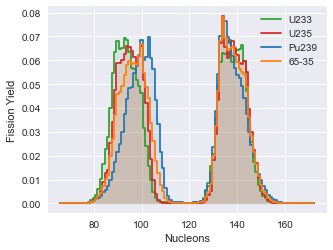

In [41]:
plot(data_A)

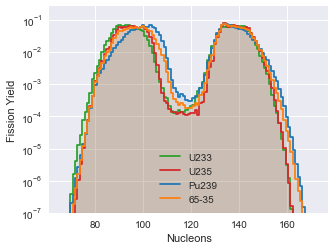

In [42]:
plot(data_A, logy=True)

In [43]:
U233_Z = pd.read_table('U233_Z', sep='\s+', skiprows=4, header=None, names=['Z', 'Fission Yield'])
U235_Z = pd.read_table('U235_Z', sep='\s+', skiprows=4, header=None, names=['Z', 'Fission Yield'])
Pu239_Z = pd.read_table('Pu239_Z', sep='\s+', skiprows=4, header=None, names=['Z', 'Fission Yield'])
mixed_Z = U235_Z*0.65 + Pu239_Z*0.35

data_Z = [U233_Z, U235_Z, Pu239_Z, mixed_Z]

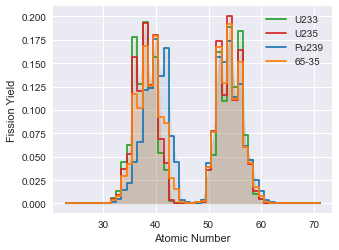

In [44]:
plot(data_Z)

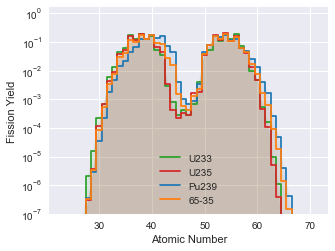

In [45]:
plot(data_Z, logy=True)

If we plot fission yields as a line, it becomes deceivingly smooth as we lose the information on the discrete nature of it. Still, it is possible to find the plot made in such a way in books and internet.

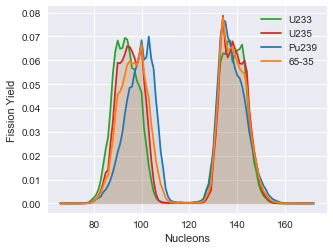

In [46]:
plot(data_A, kind='line')

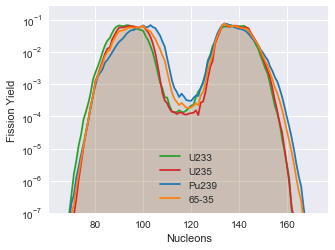

In [47]:
plot(data_A, kind='line', logy=True)